# Principal Component Analysis

* This is an unsupervised machine learning algorithm that is used for dimensionality reduction
* It is basically a transformation of the data that attempts to find out what features explains the most variance in the data
* ...i.e. get rid of the components that minimally explain variance in the data
* Example, say from 50 features, we reduce to 10 (-features/Principal Components), the first principal components explains the most variance, the second explains the most remaining variance, and so on
* ... this transformation does not reduce the number of rows
* These 10 PCs are not in 1-to-1 correspondence to the original features, but rather a linear combination of the original features
* For example, if we have original features x₁, x₂, and x₃, the first principal component might be:
    * PC₁ = 0.6x₁ + 0.3x₂ + 0.1x₃
    * The coefficients (0.6, 0.3, 0.1) form the eigenvector, and they show how much each original feature contributes to that component
    
    
* **Pros:**
    * PCA is commonly used for data visualization -where high dimensional data is reduced to 2D or 3D for plotting
    * Valuable for noise reduction (components explaining minimal variance of data are assumed to be noise)
    * PCA simplifies complex dataset and speed up machine learning algorithms while retaining most important information


* **Cons/Limitations:**
    * PCA assumes linear relationship between variables
    * PCA ssumes variance == importance (hmmm... but is this always the case? )
    * Difficult to interpret components
    * Sensitive to outliers, hence features must be scaled
    
    
* <span style="color: red;">NOTE</span>: PCA works best when original features are correlated. If the average correlation is 0.4 of more, then PCA will be beneficial


* **How can we determine the optimal number of Principal Components for PCA?**
   * The overaching goal here is to look at how much total variance is explained as we add more components
   * There are several methods to do this including the elbow method. 
   * Domain knowledge is needed to determine the best method
   * For the sake of simplicity and brivity, I will use the popular method: <span style="color: red;"> (Cummulative) Explained Variance Ratio</span>

# Breast Cancer Dataset 
* This dataset has <span style="color: red;">30 features</span> and I have explained it in a previous project in my [GitHub repo](https://github.com/Benjamin-compute/Breast-Cancer-Prediction__Comparing-4-ML-Algorithms)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# get breast data

df = pd.read_csv("breast_cancer_data")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# drop irrevalant collumns
# * id
# * diagnosis (this is the target variable)
# * Unnamed:32

df_features = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis= 1)

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

<Axes: >

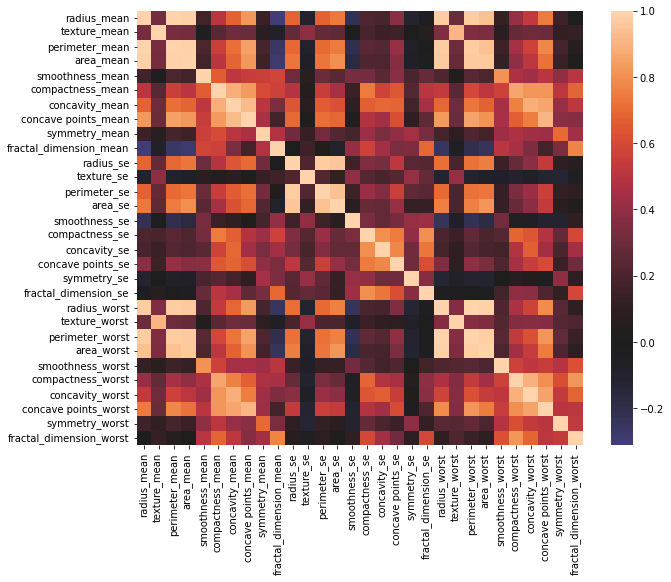

In [5]:
# See the correlation of the dataset

plt.figure(figsize = (10,8))

corr_matrix = df_features.corr()

sns.heatmap(corr_matrix, center = 0)

In [6]:
# For ease, check if the average absolute correlation is above 0.4

# Get average correlation (excluding diagonal)

avg_corr = np.abs(corr_matrix.values[np.triu_indices_from(corr_matrix.values, 1)]).mean()


print(f"Average correlation: {avg_corr:.2f}")

Average correlation: 0.39


### Insight:
* Since the average absolute correlation is ~0.4, we assume PCA will be beneficial to use
* Thus, we proceed

In [24]:
# currently we are dealing with a 30 dimensional data (which is not visually feasible). 
# Note: 30 dimensional == 30 features in df

# this is where PCA comes in.

In [8]:
# We will scale the data first, 
# so that each feature has a single unit variance
# before we actually use PCA on it

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [9]:
# fit data

scaler.fit(df_features)

StandardScaler()

In [10]:
# apply transformation 

scaled_features = scaler.transform(df_features)

In [11]:
# now perform PCA

from sklearn.decomposition import PCA


pca = PCA()   # do not specify the 'n_components' yet. so "n_components = None" (keeps all 30 components)


# fit all features/components
pca.fit(scaled_features)

PCA()

### Find the Optimal Number of Principal Components
* <span style="color: red;">Rule of thumb:</span> Choose components that explain 80-95% of the cummulative variance.

In [12]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(
                                    pca.explained_variance_ratio_
                                )

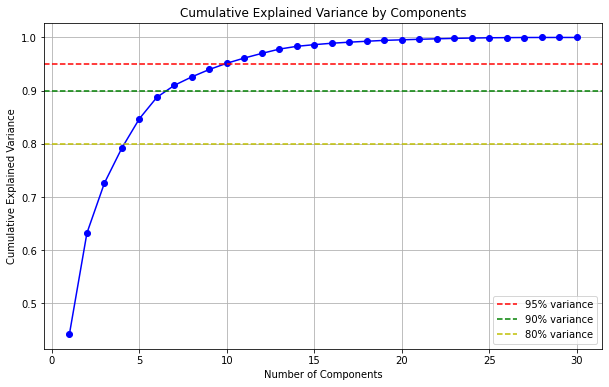

In [13]:
# Plot this "cumulative_variance"

# Plot it
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), 
         cumulative_variance, 
         'bo-')

# marking out the variance
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% variance')
plt.axhline(y=0.80, color='y', linestyle='--', label='80% variance')

# labels
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Components')
plt.legend()
plt.grid(True)


## Insights:
* From the plot, PCA will explain $ 95\% $ variance of the dataset using **10 components**
* With this number of components we can be sure that we have a balance of feature size and ML algorithm speed

In [14]:
# For validation:

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components needed for a 95% variance = {n_components_95}")

Number of components needed for a 95% variance = 10


In [15]:
# Now we re-run our PCA now using "n_components = 10"


pca_verified = PCA(n_components= 10)

# fit data
pca_verified.fit(scaled_features)

# transform
principal_components = pca_verified.transform(scaled_features)

In [16]:
# Create a DataFrame with the principal components

df_principal_components = pd.DataFrame(
                                    data= principal_components,
                                    columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
                                    )

In [17]:
df_principal_components.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157119,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240989,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059566,-1.405439,-1.116976
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263806,0.377705


In [18]:
# some checks

print(f"Shape of dataset with original features: {df_features.shape} ")
print('\n')
print(f"Shape of dataset with PCA transformed features: {df_principal_components.shape} ")

Shape of dataset with original features: (569, 30) 


Shape of dataset with PCA transformed features: (569, 10) 


### How was variance is explained by each component?

In [19]:
# get the 'explained_variance_ratio'
variance_explained = pca_verified.explained_variance_ratio_

variance_explained

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

In [20]:
# Quick Check: the above variance should sum up to 95% or more

sum(variance_explained)

0.9515688143354417

In [25]:
print('\n')

print("Variance explained by each component:")

print('\n')

# iterate through and calculate
for i, var in enumerate(variance_explained):
    print(f"PC{i+1}: {var:.3f} ({var*100:.1f}%)")



Variance explained by each component:


PC1: 0.443 (44.3%)
PC2: 0.190 (19.0%)
PC3: 0.094 (9.4%)
PC4: 0.066 (6.6%)
PC5: 0.055 (5.5%)
PC6: 0.040 (4.0%)
PC7: 0.023 (2.3%)
PC8: 0.016 (1.6%)
PC9: 0.014 (1.4%)
PC10: 0.012 (1.2%)


# Do we know what these new principal components represent?
* Unfortunately, principal components do not have meaningful column names like the original features. This is why we just named them like PC1, PC2, PC3, etc.
* However, we can interpret what they represent by examining the loadings (weights):

In [28]:
df_principal_components.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], dtype='object')

In [30]:
# Get the loadings (how much each original feature contributes to each PC)
loadings = pca_verified.components_

# Create a DataFrame to see loadings clearly
loadings_df = pd.DataFrame(
                            loadings.T,    # Transpose to get features as rows
                            columns= df_principal_components.columns, 
                            index=df_features.columns  # Original feature names
                            )

print("Loadings (contribution of each original feature to each PC):")
print(loadings_df)

Loadings (contribution of each original feature to each PC):
                              PC1       PC2       PC3       PC4       PC5  \
radius_mean              0.218902 -0.233857 -0.008531  0.041409  0.037786   
texture_mean             0.103725 -0.059706  0.064550 -0.603050 -0.049469   
perimeter_mean           0.227537 -0.215181 -0.009314  0.041983  0.037375   
area_mean                0.220995 -0.231077  0.028700  0.053434  0.010331   
smoothness_mean          0.142590  0.186113 -0.104292  0.159383 -0.365089   
compactness_mean         0.239285  0.151892 -0.074092  0.031795  0.011704   
concavity_mean           0.258400  0.060165  0.002734  0.019123  0.086375   
concave points_mean      0.260854 -0.034768 -0.025564  0.065336 -0.043861   
symmetry_mean            0.138167  0.190349 -0.040240  0.067125 -0.305941   
fractal_dimension_mean   0.064363  0.366575 -0.022574  0.048587 -0.044424   
radius_se                0.205979 -0.105552  0.268481  0.097941 -0.154456   
texture_se     

In [23]:
# Let use drill down to just one component

# To interpret PC1, look at which features have the highest loadings
print("PC1 interpretation:")

pc1_loadings = loadings_df['PC1'].abs().sort_values(ascending=False)

print(pc1_loadings.head())

PC1 interpretation:
concave points_mean     0.260854
concavity_mean          0.258400
concave points_worst    0.250886
compactness_mean        0.239285
perimeter_worst         0.236640
Name: PC1, dtype: float64


## Insights:
* These interpretations would require domain knowledge, especially seeing the magnitude or top weights of each components
* For example, PC1 has high priority on "concave point_mean, concavity_mean, concave points_worst" being with the highest weights.
* At a high level, PC1 could be a giving a SIGNAL about "concavity" of the breast tumor